In [1]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


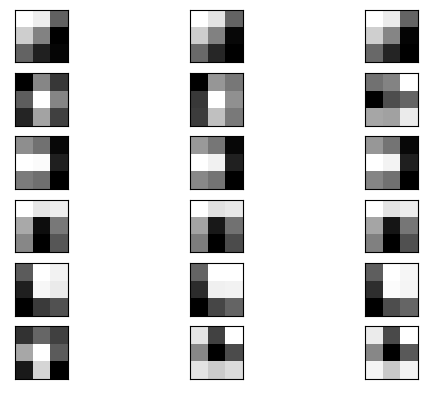

In [3]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

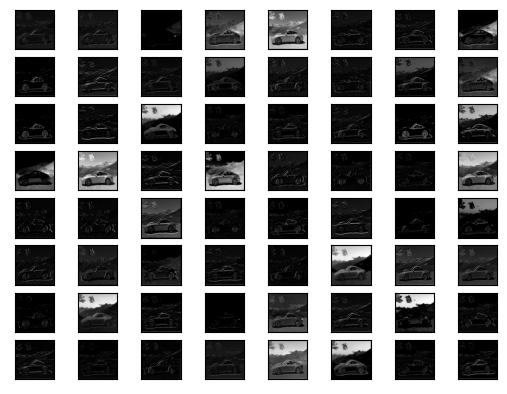

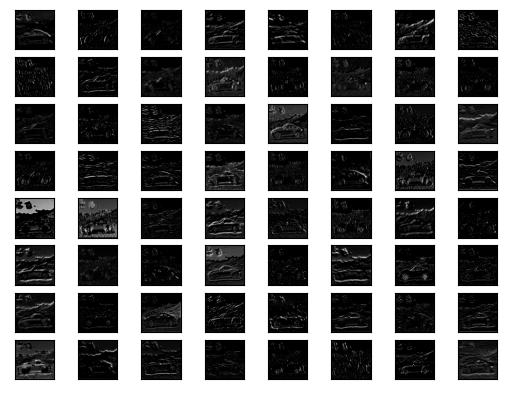

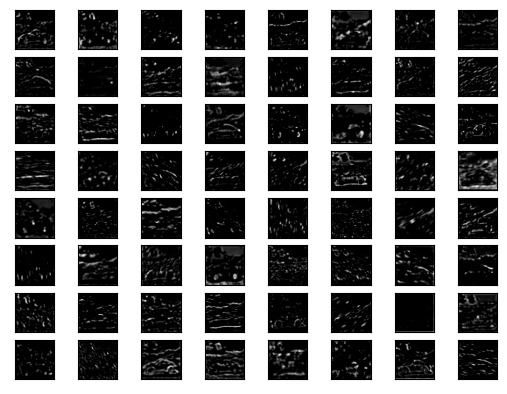

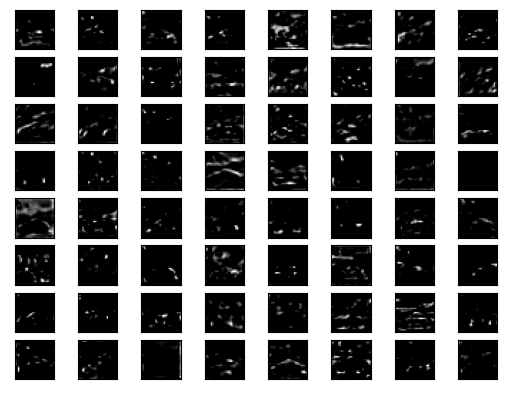

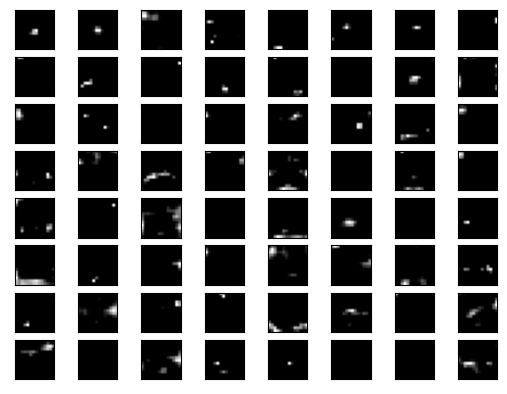

In [5]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('porsche.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [10]:

from keras.applications import vgg16
model = vgg16.VGG16()
img = load_img('porsche.jpg',target_size=(224,224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)


[[1.77094057e-06 6.43656904e-07 3.52355019e-05 2.24085634e-05
  1.85008848e-05 6.53924944e-05 1.44673730e-04 2.76955143e-05
  4.05571664e-05 8.56943188e-06 2.22745120e-06 1.08697884e-06
  5.76516868e-06 2.43783979e-05 3.88978776e-07 6.92696267e-06
  9.24742108e-06 2.81064081e-06 9.29802172e-06 1.01527712e-05
  2.33801966e-05 9.61283513e-06 1.08308712e-04 6.86153362e-05
  5.15405281e-06 8.82372387e-06 9.91060801e-07 4.10423854e-06
  1.94905851e-06 1.46103923e-06 1.28174734e-05 8.58444537e-07
  2.13241901e-06 4.38010960e-04 1.18070710e-02 5.60661720e-05
  1.39768119e-04 9.06429268e-05 7.87015961e-06 2.41669859e-05
  1.30791532e-05 4.22361927e-06 2.73347141e-05 8.20437162e-06
  3.79945050e-06 5.31859814e-06 4.72107604e-06 3.92416541e-06
  3.73765715e-06 4.91280480e-06 9.02637566e-06 4.06997933e-05
  1.93771052e-06 9.23948221e-07 1.71672286e-06 1.71269591e-07
  1.43612624e-06 1.02487729e-06 6.52224026e-06 1.43045634e-06
  4.09375025e-06 3.98290467e-07 1.38173220e-06 1.02738932e-06
  2.7127

In [9]:
vgg16.decode_predictions(prediction, top=10)

[[('n03100240', 'convertible', 0.19008383),
  ('n03792972', 'mountain_tent', 0.13237317),
  ('n02814533', 'beach_wagon', 0.10377651),
  ('n03770679', 'minivan', 0.0912495),
  ('n02974003', 'car_wheel', 0.08546613),
  ('n04285008', 'sports_car', 0.06716392),
  ('n02704792', 'amphibian', 0.06714355),
  ('n09193705', 'alp', 0.03174834),
  ('n04037443', 'racer', 0.019541772),
  ('n04252225', 'snowplow', 0.015688514)]]